Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



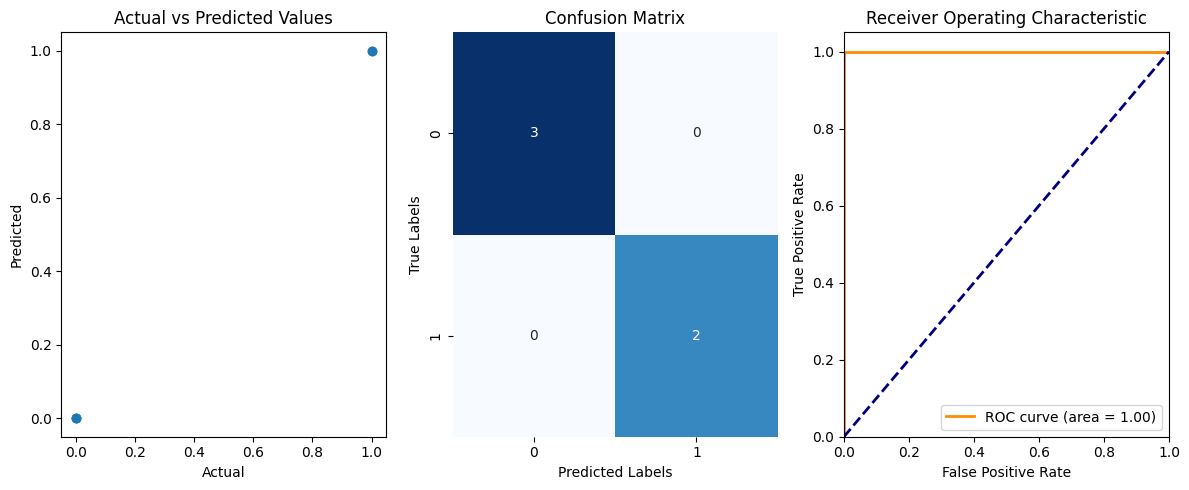

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv("MLR2.csv")

# Преобразование столбца "FertilityRate" в числовой формат
df['FertilityRate'] = pd.to_numeric(df['FertilityRate'], errors='coerce')

# Отбрасываем строки с пропущенными значениями
df.dropna(inplace=True)

# Определение признаков (X) и меток (y)
X = df[['FertilityRate', 'Ratio_MaletoFemale', 'Agriculture', 'Industry', 'Services',
        'Wage&Salaried', 'ContrFamWorkers', 'OwnAccount', 'Vulnerable']]
y = df['PerFemEmploy']

# Преобразование целевой переменной в категориальные классы (выше среднего)
mean_fem_employment = y.mean()
y_classes = (y > mean_fem_employment).astype(int)  # Бинарное разделение: выше среднего - 1

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y_classes, test_size=0.2, random_state=42)

# Обучение модели наивного байесовского классификатора
model = GaussianNB()
model.fit(X_train, y_train)

# Предсказание вероятностей для тестового набора
y_prob = model.predict_proba(X_test)[:, 1]

# Предсказание классов для тестового набора
y_pred = model.predict(X_test)

# Оценка качества модели с помощью метрик точности и отчета о классификации
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-кривая и ее AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Визуализация фактических и прогнозируемых значений
plt.figure(figsize=(12, 5))

# Scatter plot фактических и прогнозируемых значений
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")

# Матрица ошибок
plt.subplot(1, 3, 2)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# ROC-кривая
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()
